### Loading Libraries

In [203]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the dataset

In [204]:
data= pd.read_csv('train.csv')
data.head() # To see the top 5 records

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Summary

### Data Dictionary

In [205]:
Data_dictionary = pd.read_csv('Data_Dictionary.csv')
Data_dictionary

,Column Name,Description
0,MSSubClass,The building class
1,MSZoning,The general zoning classification
2,LotFrontage,Linear feet of street connected to property
3,LotArea,Lot size in square feet
4,Street,Type of road access
5,Alley,Type of alley access
6,LotShape,General shape of property
7,LandContour,Flatness of the property
8,Utilities,Type of utilities available
9,LotConfig,Lot configuration


In [206]:
# Usage of shape- to get the no of rows, columns use df.shape
data.shape

(1460, 81)

In [207]:
# check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(data.shape))

# Save the 'Id' column
train_ID = data['Id']

# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
data.drop("Id", axis = 1, inplace = True)

# check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(data.shape)) 


The train data size before dropping Id feature is : (1460, 81) 

The train data size after dropping Id feature is : (1460, 80) 


### Descriptive Statistics of Numeric Variables

In [208]:
data.describe() # Summary Statistics of numeric variables

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Checking for NULLs in data

In [209]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [210]:
missingdata = data.columns[data.isnull().any()]

In [211]:
data = data.drop(data[missingdata], axis=1)

In [212]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
                ..
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [213]:
# We can use Series.describe() to get more information on target variable
# Descriptive analysis of target variable
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

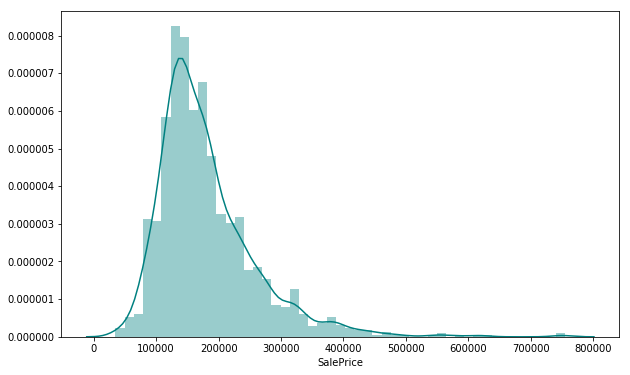

In [214]:
plt.figure(figsize=(10,6))
sns.distplot(data['SalePrice'],color="teal")

In [215]:
from scipy import stats

In [216]:
def shapiro_wilk(target):
    stat,p = stats.shapiro(target)
    print('Test Statistic ={}, p={}'.format(stat, p))
    alpha = 0.05
    if p > alpha:
        print('Disribution is normal')
    else:
        print('Distribution is not normal')

In [217]:
shapiro_wilk(data['SalePrice'])

Test Statistic =0.869671642780304, p=3.206247534576162e-33
Distribution is not normal


## Hypothesis Testing <a name="Questions"/>

### 1. The quality of furnishings impact the price of the House. <a name="1"/>

In [218]:
data['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

The order of **ExterQual** is [ 'Fa', 'TA', 'Gd', 'Ex' ] where 'Ex' being **Excellent**

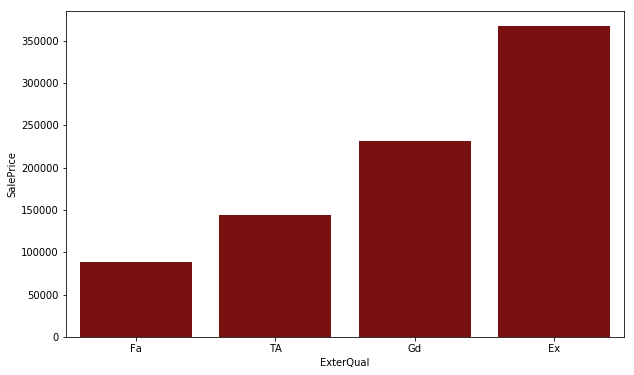

In [219]:
plt.figure(figsize=(10,6))
sns.barplot(x="ExterQual",y="SalePrice",data = data,order = ["Fa","TA","Gd","Ex"],ci=None,color='darkred')

Houses with good quality furnishings are more expensive in comparison to other houses

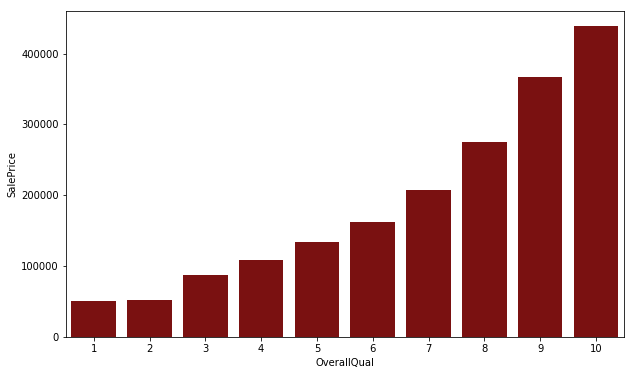

In [220]:
plt.figure(figsize=(10,6))
sns.barplot(x="OverallQual",y="SalePrice",data = data,ci=None,color='darkred')

Houses with good quality furnishings are more expensive in comparison to other houses

### 2. Size of the house directly affects the price of the house <a name="2"/>

In [221]:
len(data.GrLivArea.unique())

861

*As no of uniqe values are 861, let's plot scatter plot and check its relation*

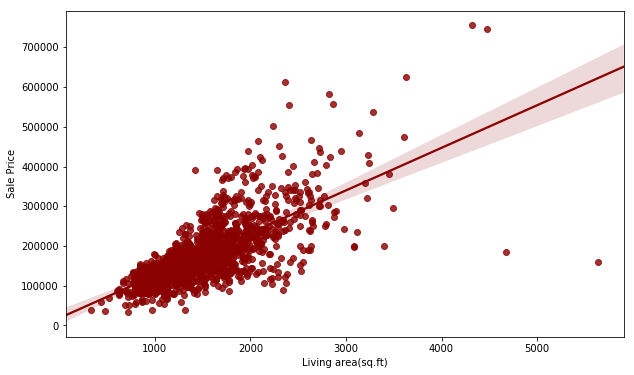

In [222]:
plt.figure(figsize=(10,6))
sns.regplot(x=data['GrLivArea'], y=data['SalePrice'],color="darkred")
plt.ylabel('Sale Price')
plt.xlabel('Living area(sq.ft)')
plt.show()

In [223]:
stat,p = stats.pearsonr(data['GrLivArea'],data['SalePrice'])
if p<0.05:
    print("p value < 0.05, hence we reject the null hypothesis which is the Living area doesnot affect the price")
else:
    print("p value > 0.05, hence we reject the null hypothesis which is the Living area doesnot affect the price")
  

p value < 0.05, hence we reject the null hypothesis which is the Living area doesnot affect the price


Size of the house directly affects the price of the house.

### 3. Size of  the parking space/garage area, affects the price of the house  <a name="3"/>

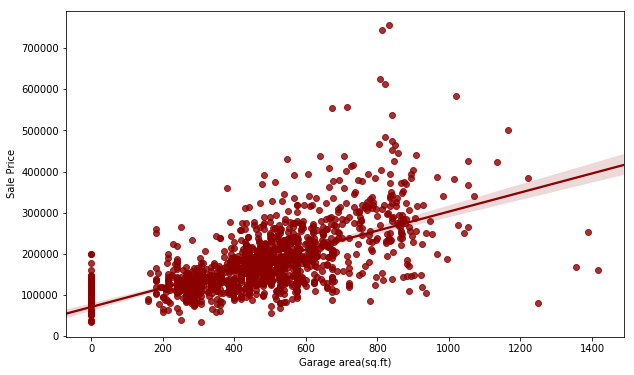

In [224]:
plt.figure(figsize=(10,6))
sns.regplot(x=data['GarageArea'], y=data['SalePrice'],color="darkred")
plt.ylabel('Sale Price')
plt.xlabel('Garage area(sq.ft)')
plt.show()

In [225]:
# run a correlation test to test the hypothesis

Larger the parking space/garage area, more expensive will be the house.

### 4. Number of rooms and bathrooms affect the price of the house <a name="4"/>

In [226]:
# Lets check the affect of number of rooms on price of the house
# Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)
data.BedroomAbvGr.unique()

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

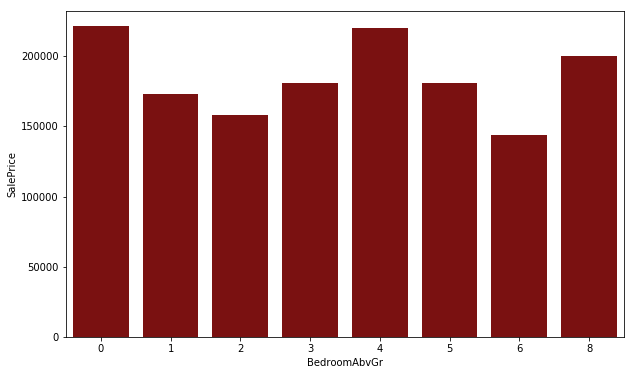

In [227]:
plt.figure(figsize=(10,6))
sns.barplot(data['BedroomAbvGr'],data['SalePrice'],color="darkred",ci=None)

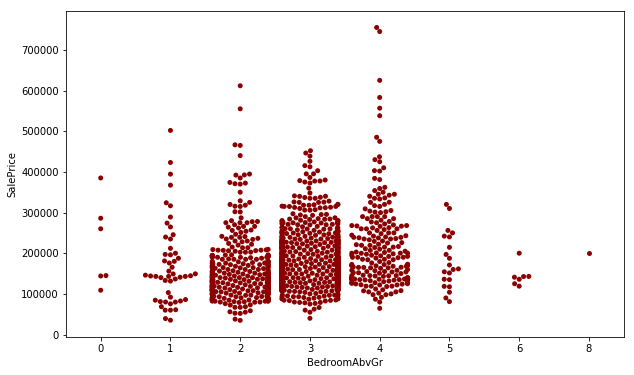

In [228]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="BedroomAbvGr",y= "SalePrice",data = data,color='darkred')

In [229]:
data.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

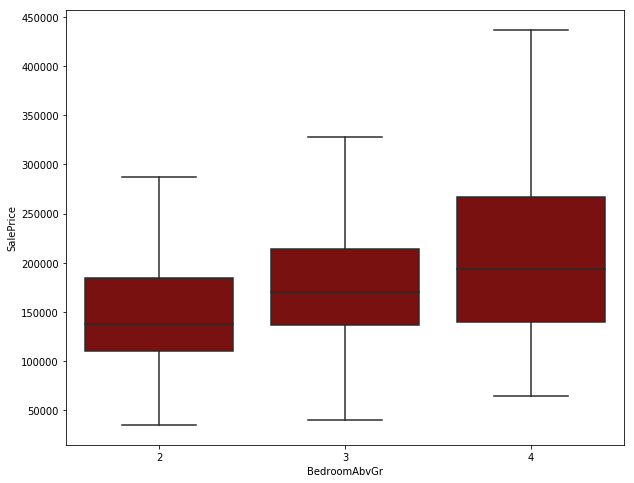

In [230]:
# Filtering out the data where BedroomAbvGr in [0,1,5,6,8]
plt.figure(figsize=(10,8))
bedroom_filtered = data[(data["BedroomAbvGr"]>1) & (data["BedroomAbvGr"]<5 )]
sns.boxplot(x="BedroomAbvGr" , y= "SalePrice", data = bedroom_filtered ,color='darkred',showfliers=False)

Too low to come to a conclusion

In [231]:
data.FullBath.unique()

array([2, 1, 3, 0], dtype=int64)

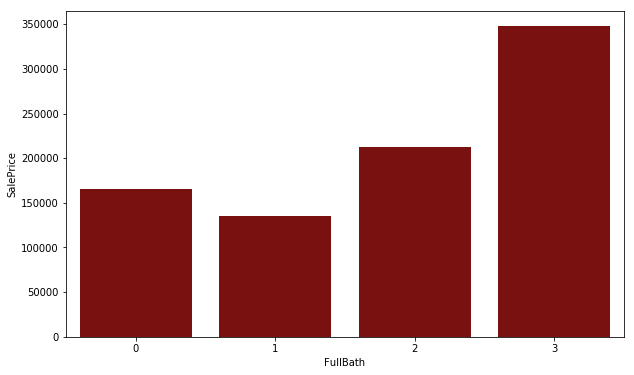

In [232]:
plt.figure(figsize=(10,6))
sns.barplot(data['FullBath'],data['SalePrice'],color="darkred",ci=None)

There is no clear distinction number of full bathrooms versus price. Lets plot swarmplot and check the distribution

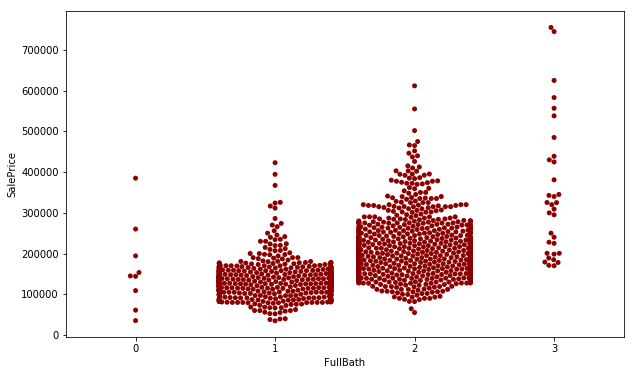

In [233]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="FullBath",y= "SalePrice",data = data,color='darkred')

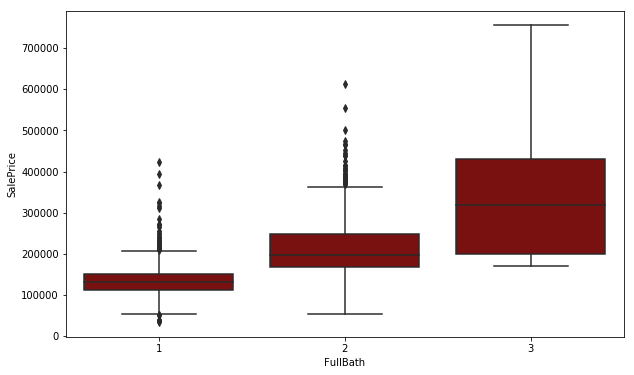

In [234]:
plt.figure(figsize=(10,6))
fullbath = data[(data["FullBath"]>0)]
sns.boxplot(x="FullBath",y="SalePrice",data = fullbath,color='darkred') #Bar plot can also be used here

It is now clear that sale price of the house increases with no of full bathrooms

In [235]:
# Half Bath (Discrete): Half baths above grade
data.HalfBath.unique()

array([1, 0, 2], dtype=int64)

In [236]:
# Plot the bar chart

There is no clear distinction number of half bathrooms versus price. Lets plot swarmplot and check the distribution

In [237]:
# plot the scatter plot

In [239]:
# plot the box plot


### 5. Having modular kitchens, wooden fittings, underground drainage system affects the price of houses  

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Kitchen Quality versus SalePrice


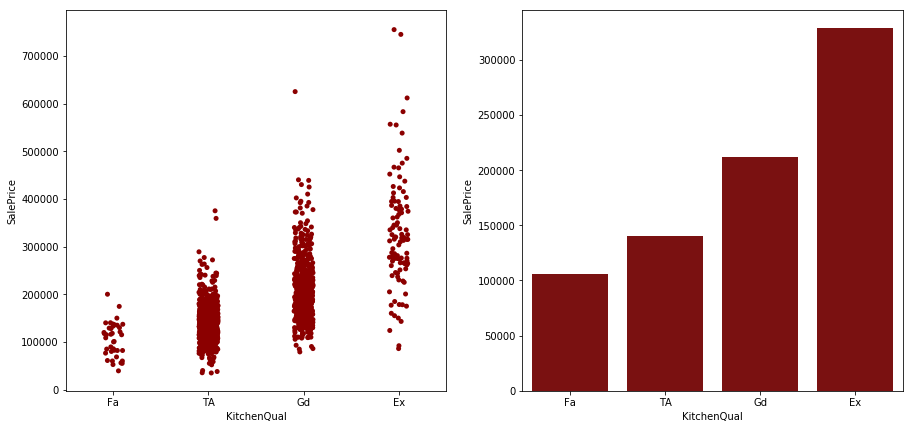

In [240]:
# Lets analyze the relationship between KitchenQual and SalePrice
print(data.KitchenQual.value_counts())
print("Kitchen Quality versus SalePrice")
fig, ax = plt.subplots(ncols = 2, figsize = (15,7))
sns.stripplot(x="KitchenQual", y="SalePrice", data=data,jitter = True, ax= ax[0],order = ["Fa","TA", "Gd", "Ex"],color='darkred')
sns.barplot(x="KitchenQual", y="SalePrice", data=data, ax= ax[1],order = ["Fa","TA", "Gd", "Ex"],color='darkred',ci=None)
plt.show()

Houses with modular kitchens, wooden fittings, underground drainage system are more expensive in comparison to other houses

### 6. Infrastructure facilities like club house, kids play area, jogging track, swimming pool, gymnasium, covered parking lots, 100% power backup, library, yoga center, 24/7 security, etc. within the township have a significant impact on price <a name="6"/>


In [241]:
print(data['Utilities'].unique())
print(data.Utilities.value_counts())


['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


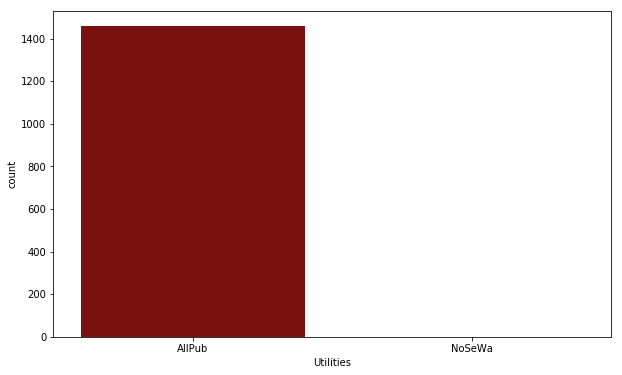

In [242]:
plt.figure(figsize=(10,6))
sns.countplot(data['Utilities'], color='darkred')

All the houses have access to all utilities except one. Hence we accept our null hypothesis which is Infrastructure facilities don't have a significant impact on price.

### 7. House prices are affected by the type of neighborhood in which they are built <a name="7"/>



In [243]:
df = (data.groupby('Neighborhood')['SalePrice'].mean())

In [244]:
df = df.sort_values()

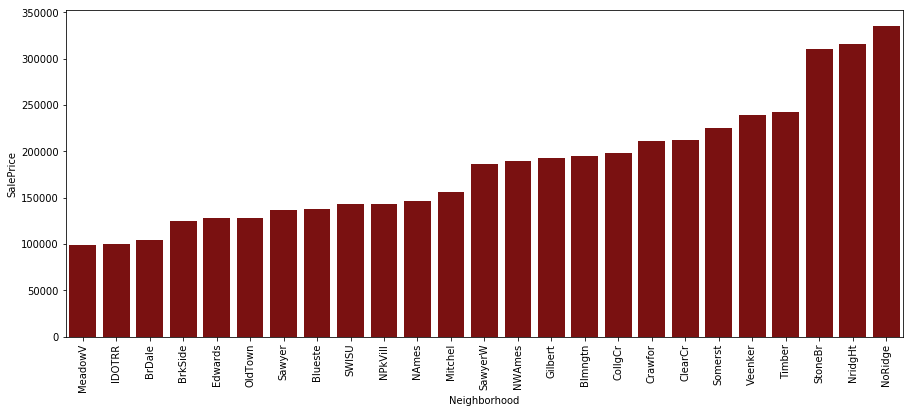

In [245]:
plt.figure(figsize=(15,6))
plot = sns.barplot(data['Neighborhood'],data['SalePrice'],color="darkred",order=df.index,ci=None)
var= plot.set_xticklabels(df.index, rotation=90)

There seems to be significant relation between the neighbourhood of the house and the price of the house. Checking the assumption with Krushkal Wallis Test   


In [246]:
lst = data['Neighborhood'].unique()
print(lst)

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [247]:
for name in lst:
        globals()[name] = data['SalePrice'].loc[data['Neighborhood']==name]

In [248]:
stat, p = stats.kruskal(CollgCr,Veenker,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,Sawyer,NridgHt,NAmes,SawyerW,IDOTRR,MeadowV,Edwards,Timber,Gilbert,StoneBr,ClearCr,NPkVill,Blmngtn,BrDale,SWISU,Blueste)
print('Statistics=%.3f, p=%.2f' % (stat, p))

Statistics=868.532, p=0.00


The p value is less than 0.05 hence we can reject the null hypothesis and accept the alternate hypothesis which is the neighbourhood has an affect on the price of the house

### 8. Heating quality affects the price of houses  <a name="8"/>



In [249]:
data.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [250]:
df = (data.groupby('HeatingQC')['SalePrice'].mean())

In [251]:
df = df.sort_values()

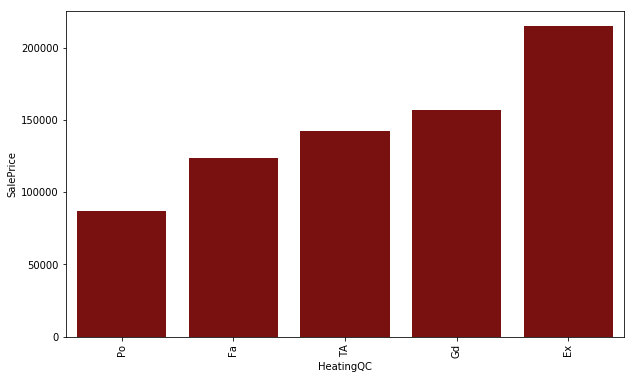

In [252]:
plt.figure(figsize=(10,6))
plot = sns.barplot(data['HeatingQC'],data['SalePrice'],color="darkred",order=df.index,ci=None)
var= plot.set_xticklabels(df.index, rotation=90)

In [253]:
lst = data['HeatingQC'].unique()
print(lst)

['Ex' 'Gd' 'TA' 'Fa' 'Po']


###  9. Re Modelling has an impact on the price of the house  <a name="9"/>


In [256]:
remodeled = data[['YearRemodAdd','YearBuilt','SalePrice']]
remodeled.head()

,YearRemodAdd,YearBuilt,SalePrice
0,2003,2003,208500
1,1976,1976,181500
2,2002,2001,223500
3,1970,1915,140000
4,2000,2000,250000


So for some houses the year built and year remodelled is same which essentially explains us that the house has not been remodelled. So let us create a flag variable which explains the remodel state of the house.

In [257]:
remodelPresence_Check = lambda x : "no" if x.YearRemodAdd == x.YearBuilt  else "yes"
remodeled['Remodel_flag'] = remodeled.apply(remodelPresence_Check, axis=1)
remodeled.head()

,YearRemodAdd,YearBuilt,SalePrice,Remodel_flag
0,2003,2003,208500,no
1,1976,1976,181500,no
2,2002,2001,223500,yes
3,1970,1915,140000,yes
4,2000,2000,250000,no


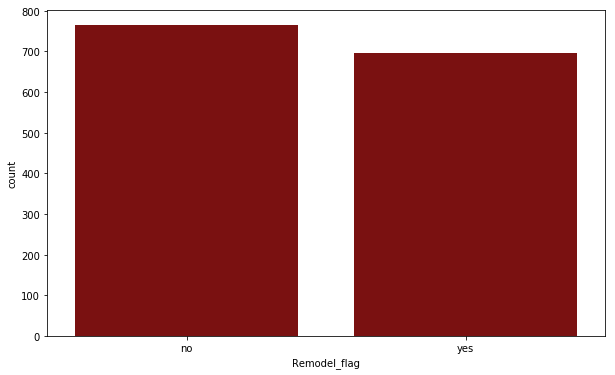

In [258]:
plt.figure(figsize=(10,6))
sns.countplot(remodeled['Remodel_flag'],color='darkred')

The Mann-Whitney U test is an alternative to KWT when there are 2 categorical independent variables

In [259]:
a = remodeled.loc[remodeled['Remodel_flag'] == 'yes',"SalePrice"].values
b = remodeled.loc[remodeled['Remodel_flag'] == 'no',"SalePrice"].values
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(a, b)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=239585.000, p=0.001


The p value is 0.001 which is less than the 0.05 so we reject the null hypothesis. Hence **Remodelling has affect the price of the house.**

### 10. Having air conditoning has an impact on the price of the house  <a name="10"/>


In [260]:
data['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

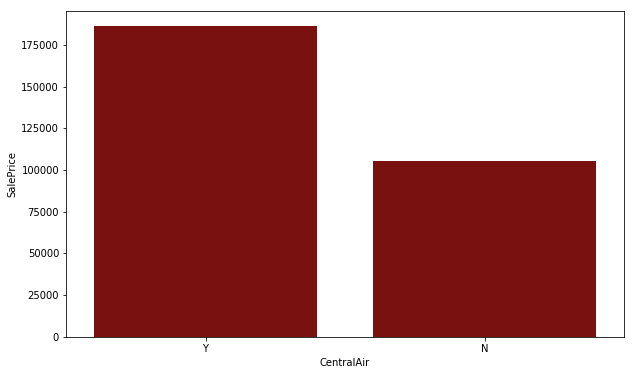

In [261]:
plt.figure(figsize=(10,6))
sns.barplot(data['CentralAir'],data['SalePrice'],color='darkred',ci=None)

### 11. The age of the house has an affect on the price of the house <a name="11"/>



In [263]:
age = data[['YearBuilt','YrSold','SalePrice']]
age.head()

,YearBuilt,YrSold,SalePrice
0,2003,2008,208500
1,1976,2007,181500
2,2001,2008,223500
3,1915,2006,140000
4,2000,2008,250000


In [264]:
age["Age"] = data["YrSold"]-data["YearBuilt"]
age.head()

,YearBuilt,YrSold,SalePrice,Age
0,2003,2008,208500,5
1,1976,2007,181500,31
2,2001,2008,223500,7
3,1915,2006,140000,91
4,2000,2008,250000,8


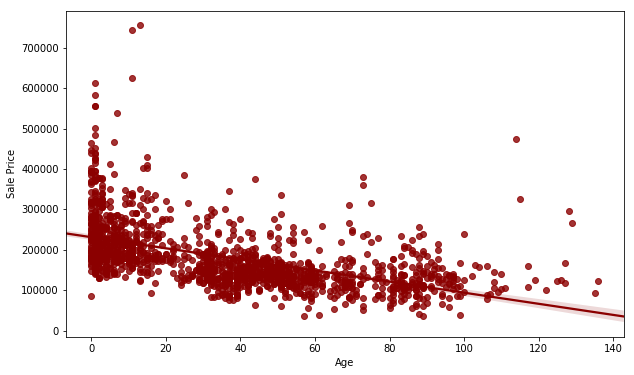

In [265]:
plt.figure(figsize=(10,6))
sns.regplot(x=age['Age'], y=age['SalePrice'],color="darkred")
plt.ylabel('Sale Price')
plt.xlabel('Age')
plt.show()

In [266]:
stat,p = stats.pearsonr(age['Age'],age['SalePrice'])
if p<0.05:
    print("p value < 0.05, hence we reject the null hypothesis which is the Living area doesnot affect the price")
else:
    print("p value > 0.05, hence we reject the null hypothesis which is the Living area doesnot affect the price")

p value < 0.05, hence we reject the null hypothesis which is the Living area doesnot affect the price


the age of the house has an affect on the price of the house

### 12. Houses with traditional/neutral layouts have a different price than houses with obsolete layouts <a name="12"/>



In [267]:
data['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [268]:
df = data.groupby('HouseStyle')['SalePrice'].mean()
df = df.sort_values(ascending=False)
df

HouseStyle
2.5Fin    220000.000000
2Story    210051.764045
1Story    175985.477961
SLvl      166703.384615
2.5Unf    157354.545455
1.5Fin    143116.740260
SFoyer    135074.486486
1.5Unf    110150.000000
Name: SalePrice, dtype: float64

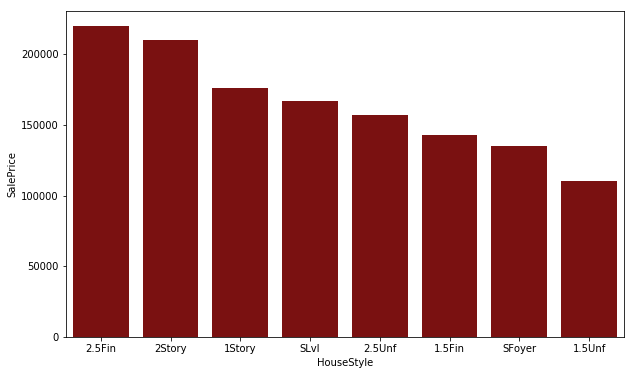

In [269]:
plt.figure(figsize=(10,6))
sns.barplot(data['HouseStyle'],data['SalePrice'],color="darkred",order=df.index,ci=None)

In [270]:
lst = data['HouseStyle'].unique()
print(lst)

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [271]:
for name in lst:
        temp = str('Style_')+ str(name)
        temp = temp.replace('.', '')
        globals()[temp] = data['SalePrice'].loc[data['HouseStyle']==name]

In [272]:
stat, p = stats.kruskal(Style_2Story,Style_1Story,Style_15Fin,Style_15Unf,Style_SFoyer,Style_SLvl,Style_25Unf,Style_25Fin)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=185.429, p=0.000


the style of the house has affect the price of the house**

# Conclusion <a name="conclusion"/>

* Houses with good quality furnishings are more expensive in comparison to other houses
* Size of the house directly affects the price of the house 
* Larger the parking space/garage area, more expensive will be the house.
* Number of rooms and bathrooms affect the price of the house.
* Houses with modular kitchens, wooden fittings, underground drainage system are more expensive in comparison to other houses
* Infrastructure facilities like club house, kids play area, jogging track, swimming pool, gymnasium, covered parking lots, 100% power backup, library, yoga center, 24/7 security, etc. within the township don't have a significant impact on price.
* Neighbourhood has an affect on the price of the house
* Houses with excellent heating quality are more expensive than other houses. 
* The age of the house has an affect on the price of the house.
* Air conditioned houses are more expensive than the normal ones 
* Houses with traditional/neutral layouts are more expensive than houses with obsolete layouts  
* Houses with excellent fire places are expensive than others.